In [34]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


from TO_sim.Sol_Kuramoto import Sol_Kuramoto_mf2 as mf2
from TO_sim.gen_Distribution import Normal,Lorentzian,Quantile_Normal,Quantile_Lorentzian
from scipy.signal import find_peaks
from TO_sim.To_Draw import Draw_theoretical_wData as DD


In [35]:

mean = lambda x :np.mean(x[-500:])
get_std  = lambda x :np.std(x[-500:])

distribution = {
    'Normal':Normal,
    'Q_Normal':Quantile_Normal,
    'Lorentzian':Lorentzian,
    'Q_Lorentzian':Quantile_Lorentzian
}
 

In [36]:

def get_groups(dtheta,sum_time=500):
    dtheta_c = np.cumsum(dtheta,axis=0)
    avg_dtheta = (dtheta_c[sum_time:]-dtheta_c[:-sum_time])/sum_time
    num_data = []
    for data in avg_dtheta[-500:]:
        diff_dtheta = np.diff(data)
        peaks, _ = find_peaks(diff_dtheta, height=0.01)
        num_data.append(np.diff(peaks))
    groups = []
    N = len(dtheta[-1])
    for diff in num_data:
        sort_re = np.sort(diff)[::-1]
        temp = []
        for i in sort_re[:5]:
            temp.append(i)
        if len(sort_re) == 0:
            temp = [N,0,0,0,0]
        else:
            for i in range(5- len(sort_re)):
                temp.append(0)
        groups.append(temp)
    return groups

In [42]:
class phase_diagram():
    def __init__(self,seed,N,m,t_end,dist='Normal',Process='F') -> None:
        self.theta_init,omega,_ = distribution[dist](N,0,1,seed=seed)
        self.omega = np.sort(omega) 
        if Process == 'B':
            self.theta_init = np.ones_like(self.theta_init)
            self.dtheta_init = np.zeros_like(self.theta_init)
        else:
            self.dtheta_init = self.omega
        self.N = N
        self.t = np.arange(0,t_end+0.1/2,0.1)
        self.m = m

    def make_meanr(self,K,sum_time = 500,look_time = 0):
        m = self.m
        t = self.t
        N = self.N
        theta_init = self.theta_init
        dtheta_init = self.dtheta_init
        omega = self.omega
        theta, dtheta,rs = mf2(K,m=m,N=N,t_array=t,p_theta=theta_init,p_dtheta= dtheta_init,p_omega=omega,result_time=look_time)

        r = mean(rs)
        rstd = get_std(rs)
        groups = get_groups(dtheta,sum_time)[-sum_time:]
        g = np.mean(groups,axis=0)
        g_std = np.std(groups,axis=0)
        return r,rstd,g,g_std
    def histerisis(self,Ks,sum_time = 500,look_time = 4000,way = 'F'):
        m = self.m
        t = self.t
        N = self.N
        theta_init = self.theta_init
        dtheta_init = self.dtheta_init
        omega = self.omega
        K_r = []
        K_rstd = []
        K_groups = []
        K_g = []
        K_g_std = []
        for K in Ks:
            theta, dtheta,rs = mf2(K,m=m,N=N,t_array=t,p_theta=theta_init,p_dtheta= dtheta_init,p_omega=omega,result_time=look_time )
            theta_init = theta[-1]
            dtheta_init = dtheta[-1]
            K_r.append( mean(rs) )
            K_rstd.append( get_std(rs) )
            groups =  get_groups(dtheta,sum_time)[-sum_time:]
            K_g.append( np.mean(groups,axis=0) )
            K_g_std.append( np.std(groups,axis=0) )
        if way=='T':
            for K in Ks[::-1]:
                theta, dtheta,rs = mf2(K,m=m,N=N,t_array=t,p_theta=theta_init,p_dtheta= dtheta_init,p_omega=omega,result_time=look_time )
                theta_init = theta[-1]
                dtheta_init = dtheta[-1]
                K_r.append( mean(rs) )
                K_rstd.append( get_std(rs) )
                groups =  get_groups(dtheta,sum_time)[-sum_time:]
                K_g.append( np.mean(groups,axis=0) )
                K_g_std.append( np.std(groups,axis=0) )
        return K_r,K_rstd,K_g,K_g_std

In [44]:
P_ = phase_diagram(seed = 10,N = 500,m = 6, t_end = 500,)

In [45]:
Ks = np.arange(0,10+0.1/2,0.1)

In [46]:
K_r,K_rstd,K_g,K_g_std = P_.histerisis(Ks)

In [47]:
K_g = np.array(K_g)

In [50]:
D_ = DD(6)

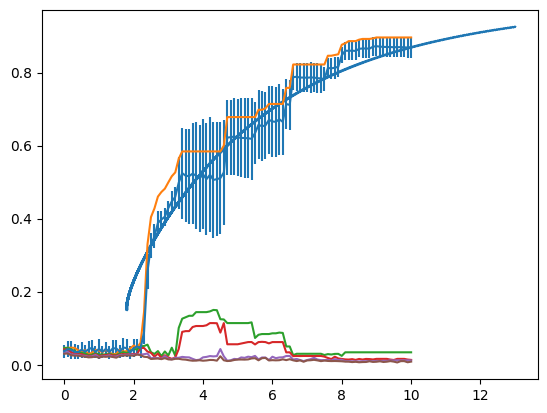

In [51]:
plt.errorbar(Ks,K_r,K_rstd)
D_.foward()
plt.plot(Ks,K_g/500,)

In [13]:
N = 500
seed = 10
K = 10 
m = 5
t_end = 500
t = np.arange(0,t_end+0.1/2,0.1)
theta_init,omega,_ = Normal(N,0,1,seed=seed)
omega = np.sort(omega) 
theta, dtheta,rs = mf2(K,m=m,N=N,t_array=t,p_theta=theta_init,p_dtheta= omega,p_omega=omega,result_time=4000)

In [16]:
dtheta_c = np.cumsum(dtheta,axis=0)
sum_time = 500
avg_dtheta = (dtheta_c[sum_time:]-dtheta_c[:-sum_time])/sum_time

In [17]:
avg_dtheta.shape

(501, 500)